<a href="https://colab.research.google.com/github/Sarthakcyber/composio/blob/master/Myntra_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
products = pd.read_excel("Myntra dataset.xlsx", sheet_name = "dim_products")
products

,Product ID,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,P0001,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,P0002,Women,Topwear,T-Shirts,Roadster,40,Blue,5
2,P0003,Women,Topwear,T-Shirts,Roadster,42,White,3
3,P0004,Women,Topwear,T-Shirts,Roadster,44,Green,2
4,P0005,Women,Topwear,T-Shirts,Puma,38,Olive,5
...,...,...,...,...,...,...,...,...
3066,P3067,Kids,Footwear,Sandals,Campus,9-12M,Olive,5
3067,P3068,Kids,Footwear,Sandals,Campus,9-12M,Teal,3
3068,P3069,Kids,Footwear,Sandals,Campus,3-6M,Sea Green,5
3069,P3070,Kids,Footwear,Sandals,Campus,3-6M,Turquoise Blue,5


In [15]:
customers=pd.read_excel("Myntra dataset.xlsx", sheet_name="dim_customers")
customers

,Customer ID,Customer Age,City,State
0,C001,30,Mumbai,Maharashtra
1,C002,35,Mumbai,Maharashtra
2,C003,36,Mumbai,Maharashtra
3,C004,40,Pune,Maharashtra
4,C005,25,Pune,Maharashtra
...,...,...,...,...
95,C096,36,Jodhpur,Rajasthan
96,C097,37,Jodhpur,Rajasthan
97,C098,38,Udaipur,Rajasthan
98,C099,39,Udaipur,Rajasthan


from matplotlib import pyplot as plt
customers['Customer Age'].plot(kind='hist', bins=20, title='Customer Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
customers['Customer Age'].plot(kind='line', figsize=(8, 4), title='Customer Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
orders = pd.read_excel("Myntra dataset.xlsx", sheet_name = "fact_orders")
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%
0,OD0001,C001,P0001,2021-05-20,349,0.30
1,OD0002,C002,P0001,2021-01-19,350,0.30
2,OD0003,C003,P0001,2021-10-28,351,0.30
3,OD0004,C004,P0001,2021-05-20,352,0.25
4,OD0005,C005,P0001,2022-11-08,353,0.25
...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50


In [24]:
orders["Month"] = orders["Date"].dt.strftime("%B")
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month
0,OD0001,C001,P0001,2021-05-20,349,0.30,May
1,OD0002,C002,P0001,2021-01-19,350,0.30,January
2,OD0003,C003,P0001,2021-10-28,351,0.30,October
3,OD0004,C004,P0001,2021-05-20,352,0.25,May
4,OD0005,C005,P0001,2022-11-08,353,0.25,November
...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July


In [25]:
gb = orders.groupby("Month").agg({"Original Price":"sum"})
gb

,Original Price
Month,
April,189860
August,234440
December,235750
February,313071
January,362024
July,214382
June,219278
March,331556
May,245850


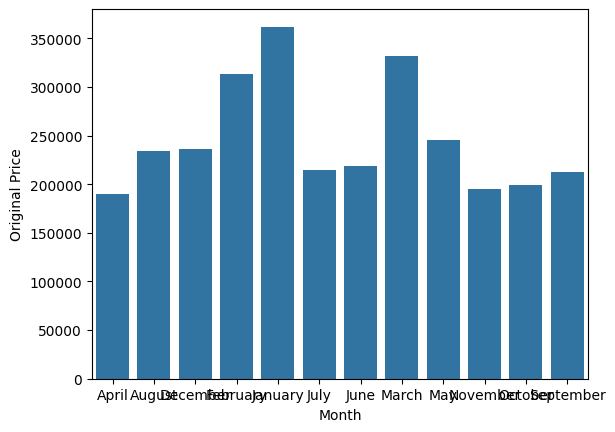

In [26]:
sns.barplot(x = gb.index , y = gb["Original Price"])
plt.show()

In [31]:
df = pd.merge(left = orders , right  = products , on = "Product ID" , how = "inner")
df

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,OD0001,C001,P0001,2021-05-20,349,0.30,May,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,OD0002,C002,P0001,2021-01-19,350,0.30,January,Women,Topwear,T-Shirts,Roadster,40,Black,4
2,OD0003,C003,P0001,2021-10-28,351,0.30,October,Women,Topwear,T-Shirts,Roadster,40,Black,4
3,OD0004,C004,P0001,2021-05-20,352,0.25,May,Women,Topwear,T-Shirts,Roadster,40,Black,4
4,OD0005,C005,P0001,2022-11-08,353,0.25,November,Women,Topwear,T-Shirts,Roadster,40,Black,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4


In [35]:
orders["Total Price"] = orders["Original Price"] - (orders["Original Price"] * orders["Discount%"])
orders

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month,Total Price
0,OD0001,C001,P0001,2021-05-20,349,0.30,May,244.30
1,OD0002,C002,P0001,2021-01-19,350,0.30,January,245.00
2,OD0003,C003,P0001,2021-10-28,351,0.30,October,245.70
3,OD0004,C004,P0001,2021-05-20,352,0.25,May,264.00
4,OD0005,C005,P0001,2022-11-08,353,0.25,November,264.75
...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January,342.50
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July,353.50
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February,909.50
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July,428.00


In [38]:
gb = orders.groupby("Month").agg({"Total Price":"sum"})
gb

,Total Price
Month,
April,123333.24
August,151195.18
December,149565.59
February,202941.95
January,232189.61
July,137832.60
June,140366.13
March,211853.22
May,156812.99


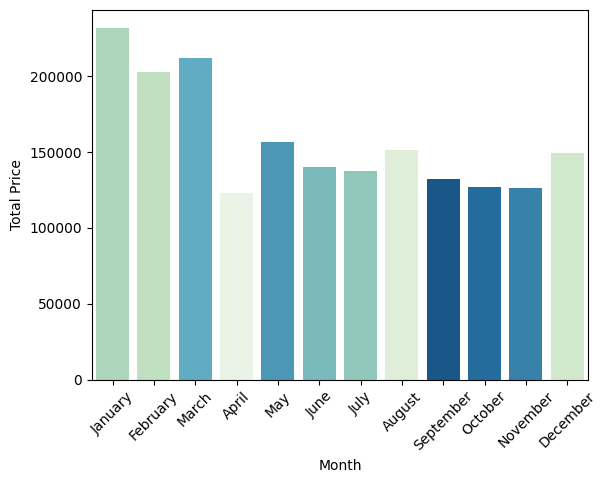

In [39]:
#plt.figure(figsize = (12,4))
sns.barplot(x = gb.index, y = gb["Total Price"], order = ["January", "February", "March",'April',"May","June","July","August","September","October","November", "December"],hue = gb.index, palette = "GnBu")
plt.xticks(rotation = 45)
plt.show()

In [41]:
df = pd.merge(left = orders, right= products, on = "Product ID", how = "inner" )
df

,Order ID,Customer ID,Product ID,Date,Original Price,Discount%,Month,Total Price,Category,Sub-category,Product Name,Brand Name,Size,Color,Ratings
0,OD0001,C001,P0001,2021-05-20,349,0.30,May,244.30,Women,Topwear,T-Shirts,Roadster,40,Black,4
1,OD0002,C002,P0001,2021-01-19,350,0.30,January,245.00,Women,Topwear,T-Shirts,Roadster,40,Black,4
2,OD0003,C003,P0001,2021-10-28,351,0.30,October,245.70,Women,Topwear,T-Shirts,Roadster,40,Black,4
3,OD0004,C004,P0001,2021-05-20,352,0.25,May,264.00,Women,Topwear,T-Shirts,Roadster,40,Black,4
4,OD0005,C005,P0001,2022-11-08,353,0.25,November,264.75,Women,Topwear,T-Shirts,Roadster,40,Black,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,OD3496,C081,P3071,2023-01-01,685,0.50,January,342.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3496,OD3497,C082,P3071,2022-07-08,707,0.50,July,353.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3497,OD3498,C083,P3071,2021-02-06,1819,0.50,February,909.50,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4
3498,OD3499,C084,P3071,2021-07-18,856,0.50,July,428.00,Kids,Footwear,Sandals,Campus,3-6M,Charcoal,4


In [42]:
gb1 = df.groupby("Category").agg({"Total Price":"sum"})
gb1

,Total Price
Category,
Beauty,312016.36
Kids,445682.43
Men,586456.23
Women,546934.66


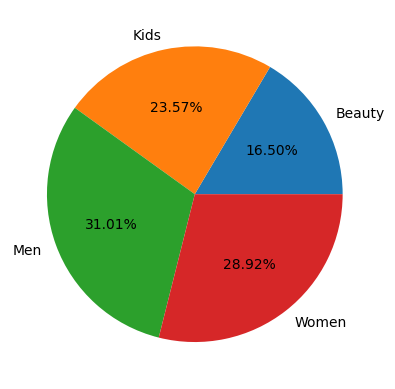

In [43]:
plt.pie(gb1["Total Price"], labels = gb1.index, autopct = "%1.2f%%")
plt.show()

In [44]:
df["Total Price"].sum()

1891089.6800000002